# Customer Churn Prediction

In [1]:
# import Libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# load the data
df = pd.read_csv('Dataset/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [8]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [13]:
X = df.drop(columns='Exited')
y = df['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [15]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [37]:
model = Sequential()
model.add(Dense(9, input_dim=10, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 9)                 99        
                                                                 
 dense_5 (Dense)             (None, 3)                 30        
                                                                 
 dense_6 (Dense)             (None, 1)                 4         
                                                                 
Total params: 133 (532.00 Byte)
Trainable params: 133 (532.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
model.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [29]:
y_train

9254    0
1561    0
1670    1
6087    1
6669    1
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: Exited, Length: 8000, dtype: int64

In [46]:
history = model.fit(X_train, y_train, epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3310 - accuracy: 0.8637 - val_loss: 0.3419 - val_accuracy: 0.8525
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3304 - accuracy: 0.8656 - val_loss: 0.3421 - val_accuracy: 0.8512
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3310 - accuracy: 0.8653 - val_loss: 0.3421 - val_accuracy: 0.8525
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3306 - accuracy: 0.8652 - val_loss: 0.3432 - val_accuracy: 0.8519
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3305 - accuracy: 0.8670 - val_loss: 0.3419 - val_accuracy: 0.8512
Epoch 6/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3302 - accuracy: 0.8672 - val_loss: 0.3417 - val_accuracy: 0.8525
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3302 - accuracy: 0.8641 - val_loss: 0.3414 - val_accuracy: 0.8525

In [42]:
model.layers[0].get_weights()

[array([[ 6.31476790e-02,  2.05598902e-02,  1.74193189e-01,
          9.74298939e-02,  3.31696533e-02, -1.55507410e-02,
          1.31531116e-02,  7.09754974e-02,  2.55972803e-01],
        [ 7.54501939e-01, -5.71368262e-02, -5.96742570e-01,
         -1.48026153e-01, -1.11240251e-02,  9.38303694e-02,
         -1.40645448e-02,  6.42949343e-01, -2.67023534e-01],
        [ 1.40568644e-01, -6.20423369e-02,  3.61519009e-02,
          7.19255432e-02, -1.37109175e-01, -2.43199262e-04,
          6.52201697e-02,  6.38329014e-02, -3.73237878e-01],
        [ 9.99381095e-02, -2.46946692e-01, -6.74777389e-01,
          5.26644051e-01, -9.58635584e-02, -7.96155930e-01,
         -1.25322104e+00, -3.41170728e-02, -4.89026099e-01],
        [-8.95186141e-02, -3.59778069e-02, -7.62380064e-02,
          1.68944940e-01, -1.55324861e-03,  2.67020613e-02,
         -3.07074916e-02,  3.31439078e-02,  3.28737676e-01],
        [ 9.23857838e-02, -2.30091944e-01, -1.09889461e-02,
         -3.70112956e-01,  8.911546

In [43]:
y_log = model.predict(X_test)
y_log

63/63 [==============================] - 0s 1ms/step


array([[0.04182254],
       [0.02594098],
       [0.20335509],
       ...,
       [0.82660234],
       [0.18265732],
       [0.25514296]], dtype=float32)

In [44]:
y_Pred = np.where(y_log>0.5, 1, 0)


In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_Pred)

0.8565

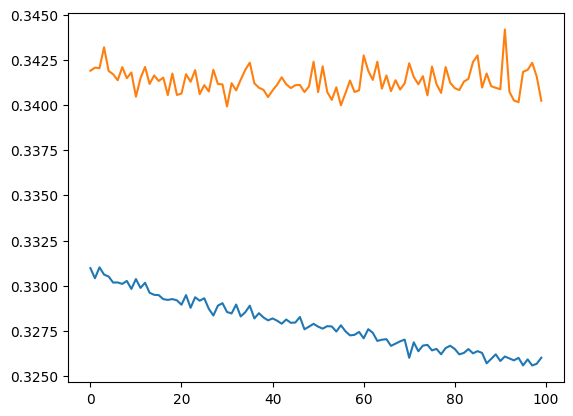

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

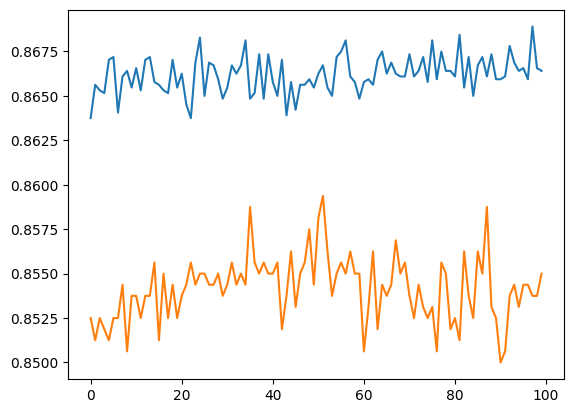

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])